In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
smi_list = ['c1ccccc1', 'CC(=O)O', 'C[C@@H](C(=O)O)N', 'C(=O)N', 'CC', 'C=C', 'CCO', 'CCN', 'C/C=C\C']

In [11]:
def fingerprinting(smi):
    cs = Chem.CanonSmiles(smi)
    ms = Chem.MolFromSmiles(cs)
    fp = FingerprintMols.FingerprintMol(ms)
    return fp

In [12]:
def TanimotoMatrix(smi_list):
    
    fps = []

    for smi in smi_list:
        fp = fingerprinting(smi)
        fps.append(fp)
        
    matrix = np.zeros([len(fps), len(fps)])

    for i in range(0,len(fps)):
        for j in range(0,len(fps)):
            simil = DataStructs.cDataStructs.TanimotoSimilarity(fps[i], fps[j])
            matrix[i][j] = simil
    
    return matrix

In [13]:
tm = TanimotoMatrix(smi_list)
tm

array([[1.        , 0.10526316, 0.08333333, 0.07692308, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.10526316, 1.        , 0.4       , 0.0625    , 0.16666667,
        0.        , 0.5       , 0.2       , 0.11111111],
       [0.08333333, 0.4       , 1.        , 0.12903226, 0.06666667,
        0.03225806, 0.2       , 0.2       , 0.15151515],
       [0.07692308, 0.0625    , 0.12903226, 1.        , 0.        ,
        0.        , 0.        , 0.22222222, 0.08333333],
       [0.        , 0.16666667, 0.06666667, 0.        , 1.        ,
        0.        , 0.33333333, 0.33333333, 0.25      ],
       [0.        , 0.        , 0.03225806, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.25      ],
       [0.        , 0.5       , 0.2       , 0.        , 0.33333333,
        0.        , 1.        , 0.2       , 0.16666667],
       [0.        , 0.2       , 0.2       , 0.22222222, 0.33333333,
        0.        , 0.2       , 1.        , 0.27272727],


In [44]:
def heatmap(matrix, smi_list):
    fig, ax = plt.subplots()
    im = ax.imshow(matrix)
    
    ax.set_xticks(np.arange(len(smi_list)))
    ax.set_yticks(np.arange(len(smi_list)))
    
    ax.set_xticklabels(smi_list)
    ax.set_yticklabels(smi_list)
    
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
    
    for i in range(len(smi_list)):
        for j in range(len(smi_list)):
            text = ax.text(j, i, round(matrix[i, j], 2), 
                           ha="center", va="center", color="w")
    plt.show()

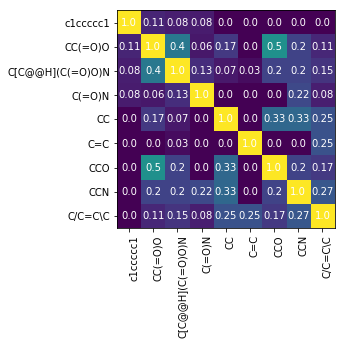

In [46]:
heatmap(tm, smi_list)

In [16]:
def Tanimoto_NewInput(new_smi, smi_list, cutoff=.5):
    
    new_fp = fingerprinting(new_smi)
    fps = []
    for smi in smi_list:
        fps.append(fingerprinting(smi))
    
    counter = 0
    
    for fp in fps:
        simil = DataStructs.cDataStructs.TanimotoSimilarity(new_fp, fp)
        if simil > cutoff:
            counter += 1
    
    percent = counter/len(smi_list)
    
    return percent

In [17]:
Tanimoto_NewInput('c1ccccc1', smi_list)

0

In [39]:
df = pd.read_csv('sampled_smiles.csv', header=None).transpose()
full_list = df.values.tolist()
list1 = full_list[0][0:10]
list2 = full_list[0][11:20]

In [54]:
#heatmap(TanimotoMatrix(list1), list1)
uptri = np.triu(TanimotoMatrix(list1), k=1)
hist_list = []

for i in range(0,len(list1)):
    for j in range(0,len(list1)):
        if uptri[i][j] != 0:
            hist_list.append(uptri[i][j])

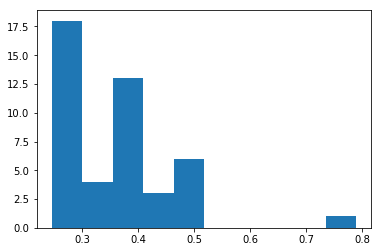

In [56]:
histogram = plt.hist(hist_list)